In [1]:
import pandas as pd
import numpy as np

## Loading The Data

In [2]:
df = pd.read_csv("movie_reviewdataset_50K.csv")
df = df[0:1000]

## Cleaning The Data (NLTK)

In [3]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [4]:
# Init Objects
tokenizer = RegexpTokenizer(r'\w+')
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

In [5]:
def CleanReview(review):
    review = review.lower()
    
    #Tokenize
    tokens = tokenizer.tokenize(review)
    new_tokens = [token for token in tokens if token not in en_stopwords]
    stemmed_tokens = [ps.stem(token) for token in new_tokens]
    
    clean_review = ' '.join(stemmed_tokens)
    return clean_review

In [6]:
df['review'] = df['review'].apply(CleanReview)

# Vectorization

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
cv = CountVectorizer()

In [9]:
reviews = cv.fit_transform(df['review']).toarray()
print(reviews.shape)

(1000, 12571)


## Dividing Dataset Into Training Data & Testing Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(reviews,df['sentiment'], test_size=0.2)

# 1) Multinomial Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [13]:
mnb = MultinomialNB()

In [14]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [15]:
mnb.predict(X_test)
y_predict = mnb.predict(X_test)

In [16]:
mnb.score(X_test,y_test)

0.81

# 2) Multivariate Bernoulli Event Model Naive Bayes (Extra)

In [17]:
bnb = BernoulliNB(binarize=0.0)

In [18]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [19]:
bnb.predict_proba(X_test)

array([[9.99999441e-01, 5.58708595e-07],
       [9.99491028e-01, 5.08971602e-04],
       [9.99422470e-01, 5.77530459e-04],
       [9.99959648e-01, 4.03516201e-05],
       [5.24690227e-08, 9.99999948e-01],
       [8.15649056e-04, 9.99184351e-01],
       [9.87010778e-06, 9.99990130e-01],
       [9.96115161e-01, 3.88483916e-03],
       [9.99967983e-01, 3.20173915e-05],
       [1.00561329e-05, 9.99989944e-01],
       [9.99378849e-01, 6.21150578e-04],
       [9.99999981e-01, 1.85227552e-08],
       [7.43279259e-02, 9.25672074e-01],
       [9.99963022e-01, 3.69782801e-05],
       [9.87806355e-01, 1.21936448e-02],
       [6.51933186e-04, 9.99348067e-01],
       [9.99876925e-01, 1.23074642e-04],
       [9.99996287e-01, 3.71274106e-06],
       [4.99757641e-12, 1.00000000e+00],
       [8.62948580e-01, 1.37051420e-01],
       [9.97664536e-01, 2.33546375e-03],
       [9.98391846e-01, 1.60815381e-03],
       [1.00000000e+00, 2.43184568e-14],
       [9.90349590e-01, 9.65040977e-03],
       [5.540905

In [20]:
bnb.predict(X_test)

array(['negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'positive', 'negative', 'negative', 'positive',
       'negative', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'negative',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'negative',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'positive', 'negative', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'negative', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'positive', 'positi

In [21]:
bnb.score(X_test,y_test)

0.83

# Generating Confusion Matrix 

In [22]:
"""
TN FP
FN FN

ACCURACY = (TP/TN)/Toal Examples
PRECISION = TP/(TP+FP)
RECALL = TP/(TP+FN)
F-MEASURE = 2*TP/(2*TP+FP+FN)
"""

'\nTN FP\nFN FN\n\nACCURACY = (TP/TN)/Toal Examples\nPRECISION = TP/(TP+FP)\nRECALL = TP/(TP+FN)\nF-MEASURE = 2*TP/(2*TP+FP+FN)\n'

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cnf_matrix = confusion_matrix(y_test,y_predict)
print(cnf_matrix)

[[89 18]
 [20 73]]


# Visualising The Confusion Matrix


In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

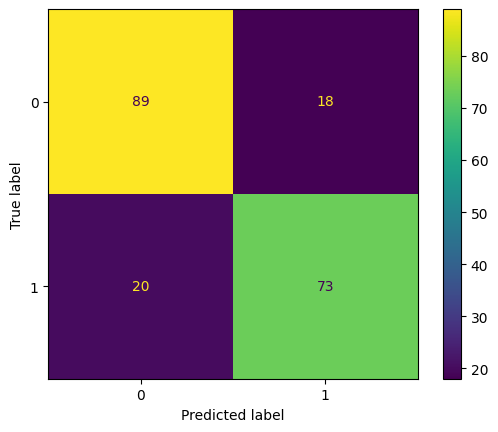

In [26]:
display = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
display.plot()